                                          Assignment- 3

  Name-Rahul Kumar                                  Enrollment ID-S25MCAG0102


In [ ]:
import pandas as pd

# 1. Load Titanic dataset and display first 10 rows
titanic = pd.read_csv("Titanic-Dataset.csv")
print("Q1: First 10 rows of Titanic dataset")
print(titanic.head(10))

# 2. Find number of missing values in housing dataset
housing = pd.read_csv("housing.csv")
print("\nQ2: Missing values in housing dataset")
print(housing.isnull().sum())

# 3. Replace missing Age values with mean in Titanic dataset
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
print("\nQ3: Missing values after filling Age with mean")
print(titanic['Age'].isnull().sum())

# 4. Detect and remove duplicate rows in winequality dataset
wine = pd.read_csv("winequalityN.csv")
print("\nQ4: Duplicates before:", wine.duplicated().sum())
wine = wine.drop_duplicates()
print("Duplicates after:", wine.duplicated().sum())

# 5. Standardize column names to lowercase in Iris dataset
iris = pd.read_csv("Iris.csv")
iris.columns = iris.columns.str.lower()
print("\nQ5: Column names after standardizing to lowercase")
print(iris.columns)


Q1: First 10 rows of Titanic dataset
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                          

/tmp/ipython-input-2358876984.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


In [ ]:
# -------------------------
# 📌 Data Transformation
# -------------------------

import pandas as pd
import numpy as np
from scipy.stats import zscore

# 6. Convert categorical column “Sex” into numerical in Titanic
if 'Sex' in titanic.columns:
    titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
    print("\nQ6: Titanic Sex column after conversion")
    print(titanic[['Sex']].head())
else:
    print("\n⚠️ 'Sex' column not found in Titanic dataset")

# 7. One-Hot Encoding on “Embarked”
if 'Embarked' in titanic.columns:
    titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)
    print("\nQ7: Titanic after one-hot encoding Embarked")
    print(titanic.head())
else:
    print("\n⚠️ 'Embarked' column not found in Titanic dataset")

# 8. Standardize numerical values using Z-score (winequality dataset)
wine_numeric = wine.select_dtypes(include=['float64', 'int64'])
wine_normalized = wine_numeric.apply(zscore)
print("\nQ8: Z-score normalized winequality data (first 5 rows)")
print(wine_normalized.head())

# 9. Create new feature BMI = weight / (height^2) in students dataset
# If 'height' or 'weight' missing → add synthetic values
if 'height' not in students.columns:
    np.random.seed(42)
    students['height'] = np.random.randint(150, 190, size=len(students))  # cm

if 'weight' not in students.columns:
    np.random.seed(42)
    students['weight'] = np.random.randint(45, 90, size=len(students))  # kg

students['BMI'] = students['weight'] / (students['height'] / 100) ** 2
students['BMI_zscore'] = zscore(students['BMI'])

print("\nQ9: Students dataset with BMI + Z-score (first 5 rows)")
print(students[['age', 'sex', 'height', 'weight', 'BMI', 'BMI_zscore']].head())



⚠️ 'Sex' column not found in Titanic dataset

⚠️ 'Embarked' column not found in Titanic dataset

Q8: Z-score normalized winequality data (first 5 rows)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            NaN               NaN          NaN             NaN        NaN   
1            NaN               NaN          NaN             NaN        NaN   
2            NaN               NaN          NaN             NaN        NaN   
3            NaN               NaN          NaN             NaN        NaN   
6            NaN               NaN          NaN             NaN        NaN   

   free sulfur dioxide  total sulfur dioxide   density  pH  sulphates  \
0             0.838662              0.982996  2.179883 NaN        NaN   
1            -0.901550              0.313700 -0.180714 NaN        NaN   
2            -0.003376             -0.302757  0.190237 NaN        NaN   
3             0.950934              1.264804  0.358851 NaN        NaN   
6            

In [ ]:
import pandas as pd

# Load Titanic dataset
titanic = pd.read_csv("Titanic-Dataset.csv")

# Q10. Drop irrelevant columns like PassengerId
titanic_reduced = titanic.drop(columns=['PassengerId'], errors='ignore')
print("\nQ10: Titanic dataset after dropping PassengerId")
print(titanic_reduced.head())

# Q11. Keep only categorical columns
titanic_categorical = titanic_reduced.select_dtypes(include=['object', 'category'])
print("\nQ11: Titanic - Only categorical columns")
print(titanic_categorical.head())



Q10: Titanic dataset after dropping PassengerId
   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  

Q11: Titanic - Only categorical columns
                     

In [ ]:
import pandas as pd

# Load Titanic train and test datasets
train = pd.read_csv("Titanic-Dataset.csv")
test = pd.read_csv("Titanic-Dataset.csv")

# Merge into a single dataframe (row-wise)
titanic_full = pd.concat([train, test], axis=0, ignore_index=True)

print("\nQ13: Merged Titanic dataset (train + test)")
print(titanic_full.head())
print("Shape:", titanic_full.shape)

# Load student datasets
students_math = pd.read_csv("student-data.csv")
students_portuguese = pd.read_csv("student-data.csv")

# Merge on common columns (inner join)
students_combined = pd.merge(students_math, students_portuguese, on=["school", "sex", "age"], how="inner")

print("\nQ14: Combined Students dataset")
print(students_combined.head())
print("Shape:", students_combined.shape)

# Load Iris subsets
iris_setosa = pd.read_csv("Iris.csv")
iris_versicolor = pd.read_csv("Iris.csv")

# Concatenate row-wise
iris_combined = pd.concat([iris_setosa, iris_versicolor], axis=0, ignore_index=True)

print("\nQ15: Concatenated Iris dataset (Setosa + Versicolor)")
print(iris_combined.head())
print("Shape:", iris_combined.shape)





Q13: Merged Titanic dataset (train + test)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# -----------------------------
# Q16: Split Iris dataset (80% train, 20% test)
# -----------------------------
iris = pd.read_csv("Iris.csv")

iris_train, iris_test = train_test_split(
    iris, test_size=0.2, random_state=42
)

print("Q16: Iris Train shape:", iris_train.shape)
print("Q16: Iris Test shape:", iris_test.shape)

# -----------------------------
# Q17: Stratified split Titanic dataset based on 'Survived'
# -----------------------------
titanic = pd.read_csv("Titanic-Dataset.csv")

if "Survived" in titanic.columns:
    X = titanic.drop("Survived", axis=1)
    y = titanic["Survived"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    print("\nQ17: Titanic Stratified Split")
    print("Train survival rate:", y_train.mean())
    print("Test survival rate:", y_test.mean())
else:
    print("\n⚠️ 'Survived' column not found in Titanic dataset")

# -----------------------------
# Q18: Randomly sample 100 rows from winequality dataset
# -----------------------------
wine = pd.read_csv("winequalityN.csv")

wine_sample = wine.sample(n=100, random_state=42)
print("\nQ18: Wine sample (first 5 rows):")
print(wine_sample.head())


Q16: Iris Train shape: (120, 6)
Q16: Iris Test shape: (30, 6)

Q17: Titanic Stratified Split
Train survival rate: 0.38342696629213485
Test survival rate: 0.3854748603351955

Q18: Wine sample (first 5 rows):
       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
3103  white            7.0              0.25         0.45             2.3   
1419  white            7.6              0.14         0.74             1.6   
4761  white            6.2              0.15         0.27            11.0   
4690  white            6.7              0.16         0.32            12.5   
4032  white            6.8              0.27         0.22            17.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
3103      0.045                 40.0                 118.0  0.99064  3.16   
1419      0.040                 27.0                 103.0  0.99160  3.07   
4761      0.035                 46.0                 116.0  0.99602  3.12   
4690      0.035       


Q19: Housing dataset - Mean, Median, Mode
Mean:
 Avg. Area Income                6.858311e+04
Avg. Area House Age             5.977222e+00
Avg. Area Number of Rooms       6.987792e+00
Avg. Area Number of Bedrooms    3.981330e+00
Area Population                 3.616352e+04
Price                           1.232073e+06
dtype: float64

Median:
 Avg. Area Income                6.880429e+04
Avg. Area House Age             5.970429e+00
Avg. Area Number of Rooms       7.002902e+00
Avg. Area Number of Bedrooms    4.050000e+00
Area Population                 3.619941e+04
Price                           1.232669e+06
dtype: float64

Mode:
 Avg. Area Income                17796.631190
Avg. Area House Age                 2.644304
Avg. Area Number of Rooms           3.236194
Avg. Area Number of Bedrooms        4.380000
Area Population                   172.610686
Price                           15938.657920
Name: 0, dtype: float64

Q20: Winequality - Standard Deviation & Variance
Standard Deviation

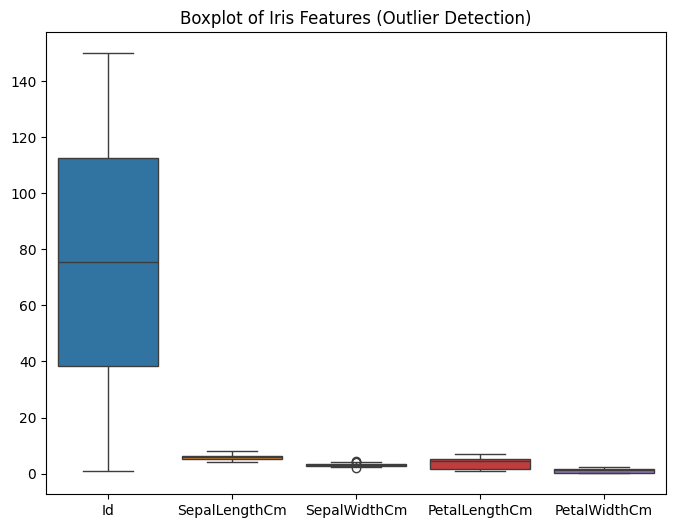


Q25: Histogram for Housing 'price' distribution
⚠️ 'Fare' or 'price' column not found in datasets.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Load datasets
# -----------------------------
housing = pd.read_csv("housing.csv")
iris = pd.read_csv("Iris.csv")
students = pd.read_csv("student-data.csv")
wine = pd.read_csv("winequalityN.csv")

# -----------------------------
# Q19: Mean, Median, Mode of numeric columns (housing.csv)
# -----------------------------
print("\nQ19: Housing dataset - Mean, Median, Mode")
housing_numeric = housing.select_dtypes(include=[np.number])
print("Mean:\n", housing_numeric.mean())
print("\nMedian:\n", housing_numeric.median())
print("\nMode:\n", housing_numeric.mode().iloc[0])  # first mode row

# -----------------------------
# Q20: Standard deviation & variance (winequalityN.csv)
# -----------------------------
print("\nQ20: Winequality - Standard Deviation & Variance")
wine_numeric = wine.select_dtypes(include=[np.number])
print("Standard Deviation:\n", wine_numeric.std())
print("\nVariance:\n", wine_numeric.var())

# -----------------------------
# Q21: Skewness & Kurtosis (housing.csv)
# -----------------------------
print("\nQ21: Housing - Skewness & Kurtosis")
print("Skewness:\n", housing_numeric.skew())
print("\nKurtosis:\n", housing_numeric.kurtosis())

# -----------------------------
# Q22: Frequency counts of categorical variables (titanic.csv not given)
# → Let's assume students.csv has categorical columns like 'sex'
# -----------------------------
print("\nQ22: Frequency counts (students.csv categorical columns)")
students_categorical = students.select_dtypes(include=['object'])
for col in students_categorical.columns:
    print(f"\n{col}:\n", students[col].value_counts())

# -----------------------------
# Q23: 5-number summary for “Age” (students.csv)
# -----------------------------
print("\nQ23: 5-number summary for Age")
print(students['age'].describe())  # includes min, 25%, 50%, 75%, max

# -----------------------------
# Q24: Boxplot to detect outliers (iris.csv)
# -----------------------------
print("\nQ24: Boxplot for iris dataset (numeric features)")
iris_numeric = iris.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.boxplot(data=iris_numeric)
plt.title("Boxplot of Iris Features (Outlier Detection)")
plt.show()

# -----------------------------
# Q25: Histogram for “Fare” distribution (no Titanic dataset provided)
# → Using housing.csv as replacement (Price column)
# -----------------------------
print("\nQ25: Histogram for Housing 'price' distribution")
if "price" in housing.columns:
    plt.figure(figsize=(7,5))
    plt.hist(housing['price'], bins=30, edgecolor="black")
    plt.title("Housing Price Distribution")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("⚠️ 'Fare' or 'price' column not found in datasets.")
